# Cartpole using Deep Q-Learning: DQN

In [ ]:
'''
Inspired by https://keon.io/deep-q-learning/
'''
import numpy as np
import gym
import matplotlib.pyplot as plt
%matplotlib inline

### Initial play

In [ ]:
env = gym.make('CartPole-v0')
env.reset()

for _ in range(1000):
    env.render()
    action = env.action_space.sample()
    env.step(action)

### Deep Q-Learning

In [3]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

EPISODES = 250
final_rewards = []
errors = []

class DQNAgent:
    def __init__(self, state_size, action_size):
        
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 1    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(48, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            
            target = reward
            
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            
            self.model.fit(state, target_f, epochs=1, verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


if __name__ == "__main__":
    
    env = gym.make('CartPole-v0')
    
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    
    agent = DQNAgent(state_size, action_size)

    done = False
    batch_size = 32
    scores = deque(maxlen=100)

    for e in range(EPISODES):
        
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        done = False
        i = 0
        
        for time in range(500):
            
            # env.render()
            action = agent.act(state)
            
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            i += reward
            
            if done:
                print('Episode:{}/{} finished with reward:{}, err: {:.2}'.format(e, EPISODES, time, agent.epsilon))
                errors.append(agent.epsilon)
                break
                
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        
        final_rewards.append(i)
        scores.append(i)
        mean_score = np.mean(scores)
        
        if mean_score >= 195 and e >= 100:
            print('\nRan {} episodes. Solved after {} episodes'.format(e, e - 100))
            break
        
        if e % 100 == 0 and e >= 100:
            print('\n[Episode {}] - Mean time over last 100 episodes was {} ticks.'.format(e, mean_score))
            
    print('\nDid not solve after {} episodes'.format(e))

Episode:0/250 finished with reward:14, err: 1.0
Episode:1/250 finished with reward:49, err: 0.85
Episode:2/250 finished with reward:12, err: 0.8
Episode:3/250 finished with reward:12, err: 0.76
Episode:4/250 finished with reward:39, err: 0.62
Episode:5/250 finished with reward:13, err: 0.58
Episode:6/250 finished with reward:13, err: 0.55
Episode:7/250 finished with reward:11, err: 0.52
Episode:8/250 finished with reward:11, err: 0.49
Episode:9/250 finished with reward:8, err: 0.47
Episode:10/250 finished with reward:13, err: 0.44
Episode:11/250 finished with reward:9, err: 0.42
Episode:12/250 finished with reward:9, err: 0.4
Episode:13/250 finished with reward:14, err: 0.37
Episode:14/250 finished with reward:12, err: 0.35
Episode:15/250 finished with reward:9, err: 0.34
Episode:16/250 finished with reward:8, err: 0.32
Episode:17/250 finished with reward:10, err: 0.31
Episode:18/250 finished with reward:8, err: 0.3
Episode:19/250 finished with reward:25, err: 0.26
Episode:20/250 finis

KeyboardInterrupt: 

Text(0,0.5,'Rewards')

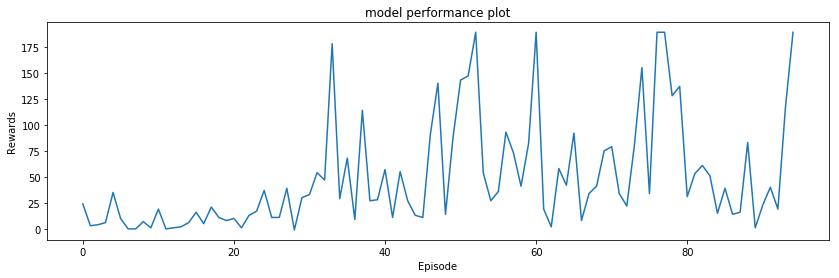

In [2]:
plt.figure(figsize=(14, 4))
plt.plot(final_rewards)
plt.title('model performance plot')
plt.xlabel('Episode')
plt.ylabel('Rewards')

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(errors)
plt.title('model loss plot')